### Importing the required libraries 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv("rainfall in india 1901-2022.csv")
df.head()

SUBDIVISION    YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  Andaman & Nicobar Islands  1901.0  49.2   87.1  29.2    2.3  528.8  517.5   
1  Andaman & Nicobar Islands  1902.0   0.0  159.8  12.2    0.0  446.1  537.1   
2  Andaman & Nicobar Islands  1903.0  12.7  144.0   0.0    1.0  235.1  479.9   
3  Andaman & Nicobar Islands  1904.0   9.4   14.7   0.0  202.4  304.5  495.1   
4  Andaman & Nicobar Islands  1905.0   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL     JF    MAM    JJAS  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2  136.3  560.3  1696.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7  159.8  458.3  2185.9   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4  156.7  236.1  1874.0   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6   24.1  506.9  1977.6   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7    1.3  309.7  1624.9   

     OND  
0  980.3  
1  716.7  
2  690.6  
3  571.0  
4  630.8

## Data Exploration and Pre-Processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4368 non-null   object 
 1   YEAR         4368 non-null   int64  
 2   JAN          4364 non-null   float64
 3   FEB          4365 non-null   float64
 4   MAR          4362 non-null   float64
 5   APR          4364 non-null   float64
 6   MAY          4365 non-null   float64
 7   JUN          4363 non-null   float64
 8   JUL          4361 non-null   float64
 9   AUG          4364 non-null   float64
 10  SEP          4362 non-null   float64
 11  OCT          4361 non-null   float64
 12  NOV          4357 non-null   float64
 13  DEC          4358 non-null   float64
 14  ANNUAL       4342 non-null   float64
 15  JF           4362 non-null   float64
 16  MAM          4359 non-null   float64
 17  JJAS         4358 non-null   float64
 18  OND          4350 non-null   float64
dtypes: flo

In [4]:
df.describe()

YEAR          JAN          FEB          MAR          APR  \
count  4368.000000  4364.000000  4365.000000  4362.000000  4364.000000   
mean   1961.725275    19.379881    21.425315    27.200596    43.082516   
std      35.157607    40.116034    35.543548    46.480982    67.851249   
min    1901.000000     0.000000     0.000000     0.000000     0.000000   
25%    1931.000000     0.600000     0.500000     1.025000     3.000000   
50%    1962.000000     6.000000     6.500000     7.800000    15.500000   
75%    1992.000000    22.200000    26.300000    31.375000    50.200000   
max    2022.000000  1433.000000   403.500000   605.600000   595.100000   

               MAY          JUN          JUL          AUG          SEP  \
count  4365.000000  4363.000000  4361.000000  4364.000000  4362.000000   
mean     86.471180   229.411231   346.561775   290.316384   198.661394   
std     122.981063   233.231342   268.492669   189.970405   136.880955   
min       0.000000     0.400000     0.000000     0.000000     0.100000   
25%       8.900000    70.900000   176.700000   156.475000   101.100000   
50%      37.300000   138.600000   284.400000   258.500000   174.450000   
75%      98.400000   302.650000   416.700000   377.700000   266.500000   
max    1168.600000  1609.900000  2362.800000  1664.600000  1222.000000   

               OCT          NOV          DEC       ANNUAL           JF  \
count  4361.000000  4357.000000  4358.000000  4342.000000  4362.000000   
mean     96.094267    39.601308    19.350046  1405.164789    40.033492   
std      99.755287    68.845098    43.848418   906.103885    58.793106   
min       0.000000     0.000000     0.000000    62.300000     0.000000   
25%      15.100000     0.700000     0.100000   793.875000     4.000000   
50%      66.400000     9.400000     3.200000  1116.700000    18.600000   
75%     148.900000    44.900000    17.875000  1638.925000    49.500000   
max     948.300000   648.900000   617.500000  6634.900000   699.500000   

               MAM         JJAS          OND  
count  4359.000000  4358.000000  4350.000000  
mean    156.314846  1060.186945   154.246923  
std     201.216557   704.787918   171.903018  
min     -91.100000    57.400000     0.000000  
25%      24.900000   574.325000    33.500000  
50%      75.170000   878.350000    96.400000  
75%     196.900000  1275.750000   211.125000  
max    1745.800000  4536.900000  1724.000000

In [5]:
df.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS           10
OND            18
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['SUBDIVISION'].value_counts()

SUBDIVISION
West Uttar Pradesh                    122
Konkan & Goa                          122
Uttarakhand                           122
Telangana                             122
Tamil Nadu                            122
Sub Himalayan West Bengal & Sikkim    122
South Interior Karnataka              122
Saurashtra & Kutch                    122
Rayalseema                            122
Punjab                                122
Orissa                                122
North Interior Karnataka              122
Naga Mani Mizo Tripura                122
Matathwada                            122
Madhya Maharashtra                    122
West Rajasthan                        122
Kerala                                122
West Madhya Pradesh                   122
Jharkhand                             122
Jammu & Kashmir                       122
Himachal Pradesh                      122
Haryana Delhi & Chandigarh            122
Gujarat Region                        122
Gangetic West Bengal  

In [8]:
df.mean(numeric_only=True)

YEAR      1961.725275
JAN         19.379881
FEB         21.425315
MAR         27.200596
APR         43.082516
MAY         86.471180
JUN        229.411231
JUL        346.561775
AUG        290.316384
SEP        198.661394
OCT         96.094267
NOV         39.601308
DEC         19.350046
ANNUAL    1405.164789
JF          40.033492
MAM        156.314846
JJAS      1060.186945
OND        154.246923
dtype: float64

In [9]:
# filling na values with mean
df = df.fillna(df.mean(numeric_only=True))

In [10]:
df.head(25)

SUBDIVISION  YEAR    JAN    FEB         MAR    APR    MAY  \
0   Andaman & Nicobar Islands  1901   49.2   87.1   29.200000    2.3  528.8   
1   Andaman & Nicobar Islands  1902    0.0  159.8   12.200000    0.0  446.1   
2   Andaman & Nicobar Islands  1903   12.7  144.0    0.000000    1.0  235.1   
3   Andaman & Nicobar Islands  1904    9.4   14.7    0.000000  202.4  304.5   
4   Andaman & Nicobar Islands  1905    1.3    0.0    3.300000   26.9  279.5   
5   Andaman & Nicobar Islands  1906   36.6    0.0    0.000000    0.0  556.1   
6   Andaman & Nicobar Islands  1907  110.7    0.0  113.300000   21.6  616.3   
7   Andaman & Nicobar Islands  1908   20.9   85.1    0.000000   29.0  562.0   
8   Andaman & Nicobar Islands  1910   26.6   22.7  206.300000   89.3  224.5   
9   Andaman & Nicobar Islands  1911    0.0    8.4    0.000000  122.5  327.3   
10  Andaman & Nicobar Islands  1912  583.7    0.8    0.000000   21.9  140.7   
11  Andaman & Nicobar Islands  1913   84.8    0.5    1.300000    2.5  190.7   
12  Andaman & Nicobar Islands  1914    0.0    0.0    0.000000   37.7  298.8   
13  Andaman & Nicobar Islands  1915   45.0   56.7   33.300000   40.9  170.2   
14  Andaman & Nicobar Islands  1916    0.0    0.0    0.000000    0.5  487.4   
15  Andaman & Nicobar Islands  1917    8.0    3.6  112.000000    4.5  295.9   
16  Andaman & Nicobar Islands  1918   77.4    6.9   11.400000   10.7  729.3   
17  Andaman & Nicobar Islands  1919   10.2   18.0    0.000000   35.5  283.9   
18  Andaman & Nicobar Islands  1920  122.3    7.4    3.100000   13.0  237.4   
19  Andaman & Nicobar Islands  1921   13.2    3.1    0.000000   37.5  351.2   
20  Andaman & Nicobar Islands  1922  245.3   34.3   15.600000  323.1  289.7   
21  Andaman & Nicobar Islands  1923   79.5    0.0   27.200596   91.3  293.5   
22  Andaman & Nicobar Islands  1924   28.7    0.0   14.800000   89.7  191.2   
23  Andaman & Nicobar Islands  1925   36.6    0.0    8.600000   50.4  282.2   
24  Andaman & Nicobar Islands  1926  122.1    0.0    0.000000    0.5  198.4   

      JUN    JUL    AUG    SEP    OCT    NOV         DEC       ANNUAL     JF  \
0   517.5  365.1  481.1  332.6  388.5  558.2   33.600000  3373.200000  136.3   
1   537.1  228.9  753.7  666.2  197.2  359.0  160.500000  3520.700000  159.8   
2   479.9  728.4  326.7  339.0  181.2  284.4  225.000000  2957.400000  156.7   
3   495.1  502.0  160.1  820.4  222.2  308.7   40.100000  3079.600000   24.1   
4   628.7  368.7  330.5  297.0  260.7   25.4  344.700000  2566.700000    1.3   
5   733.3  247.7  320.5  164.3  267.8  128.9   79.200000  2534.400000   36.6   
6   305.2  443.9  377.6  200.4  264.4  648.9  245.600000  3347.900000  110.7   
7   693.6  481.4  699.9  428.8  170.7  208.1  196.900000  3576.400000  106.0   
8   472.7  264.3  337.4  626.6  208.2  267.3  153.500000  2899.400000   49.3   
9   649.0  253.0  187.1  464.5  333.8   94.5  247.100000  2687.200000    8.4   
10  549.8  468.9  370.3  386.2  318.7  117.2    2.300000  2960.500000  584.5   
11  530.0  280.8  205.8  580.1  288.8  133.0   67.500000  2365.800000   85.3   
12  383.3  792.8  520.5  310.8  139.8  184.4  289.700000  2957.800000    0.0   
13  334.7  269.0  317.2  429.8  468.1  258.4  318.000000  2741.300000  101.7   
14  450.1  317.3  425.0  561.2  369.7  192.6  133.700000  2937.500000    0.0   
15  301.1  394.8  437.4  471.8  238.1  108.3  236.900000  2612.400000   11.6   
16  710.8  200.9  455.4  303.3  227.0  366.9  175.000000  3275.000000   84.3   
17  542.5  246.5  259.8  170.7  186.2  340.4  258.400000  2352.100000   28.2   
18  546.9  294.4  467.4  505.4  397.5  262.9   85.500000  2943.200000  129.7   
19  282.7  487.1  330.0  581.2  360.7  118.2   41.500000  2606.400000   16.3   
20  506.1  425.8  307.4  511.7  162.0  541.0  192.200000  3554.200000  279.6   
21  808.4  636.9  182.2  560.5  131.9  197.4   70.600000  1405.164789   79.5   
22  261.2  493.3  290.9  251.2  331.1  378.6   19.350046  1405.164789   28.7   
23  663.8  241.8  278.2  201.9  249.5  271.

In [11]:
df.isnull().any()

SUBDIVISION    False
YEAR           False
JAN            False
FEB            False
MAR            False
APR            False
MAY            False
JUN            False
JUL            False
AUG            False
SEP            False
OCT            False
NOV            False
DEC            False
ANNUAL         False
JF             False
MAM            False
JJAS           False
OND            False
dtype: bool

In [12]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 1943, 1944, 1945, 1948,
       1909], dtype=int64)

In [13]:
df.YEAR.unique()

(4368, 19)

## Data Visualization

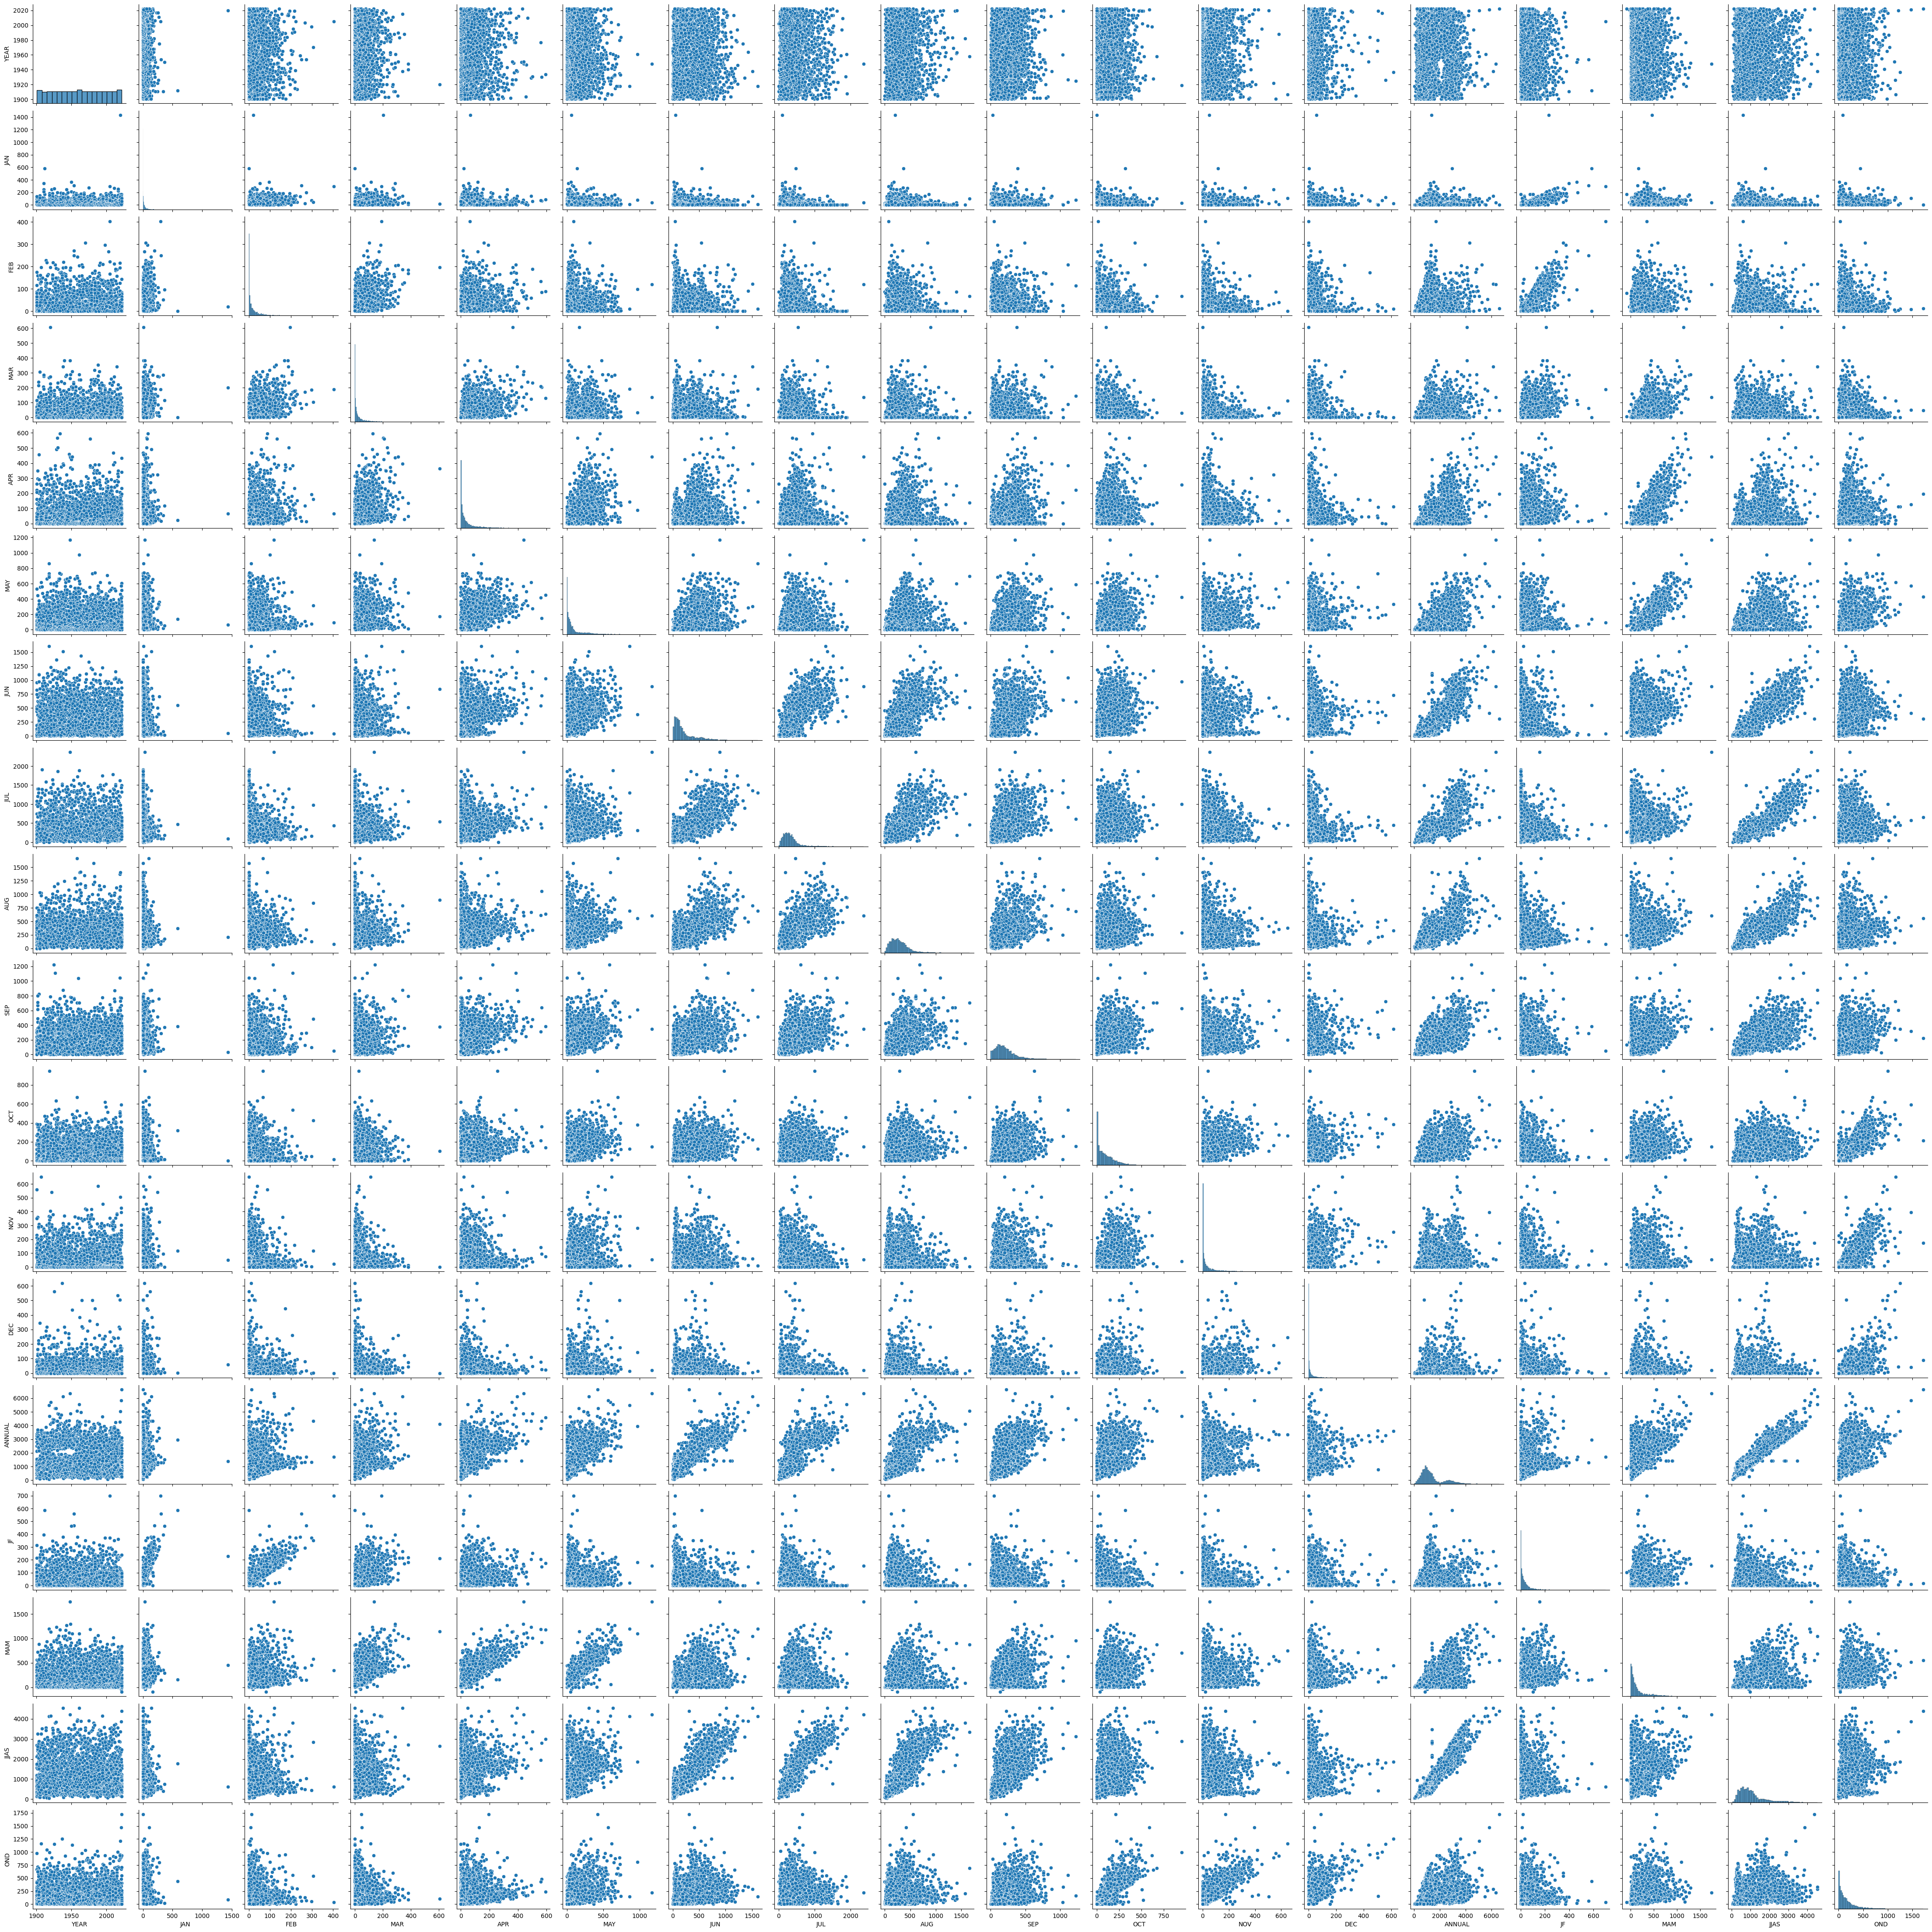

In [14]:
sns.pairplot(df)

Index(['SUBDIVISION'], dtype='object')


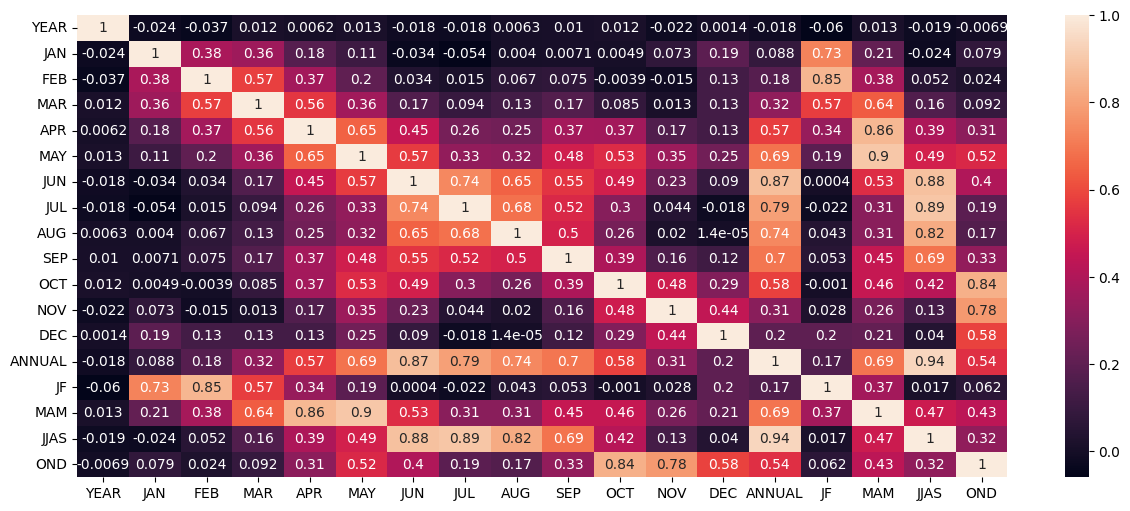

In [15]:
non_numeric_columns = df.select_dtypes(exclude=np.number).columns
print(non_numeric_columns)
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

`The above heatmap shows the coorelation between different features in the dataset`

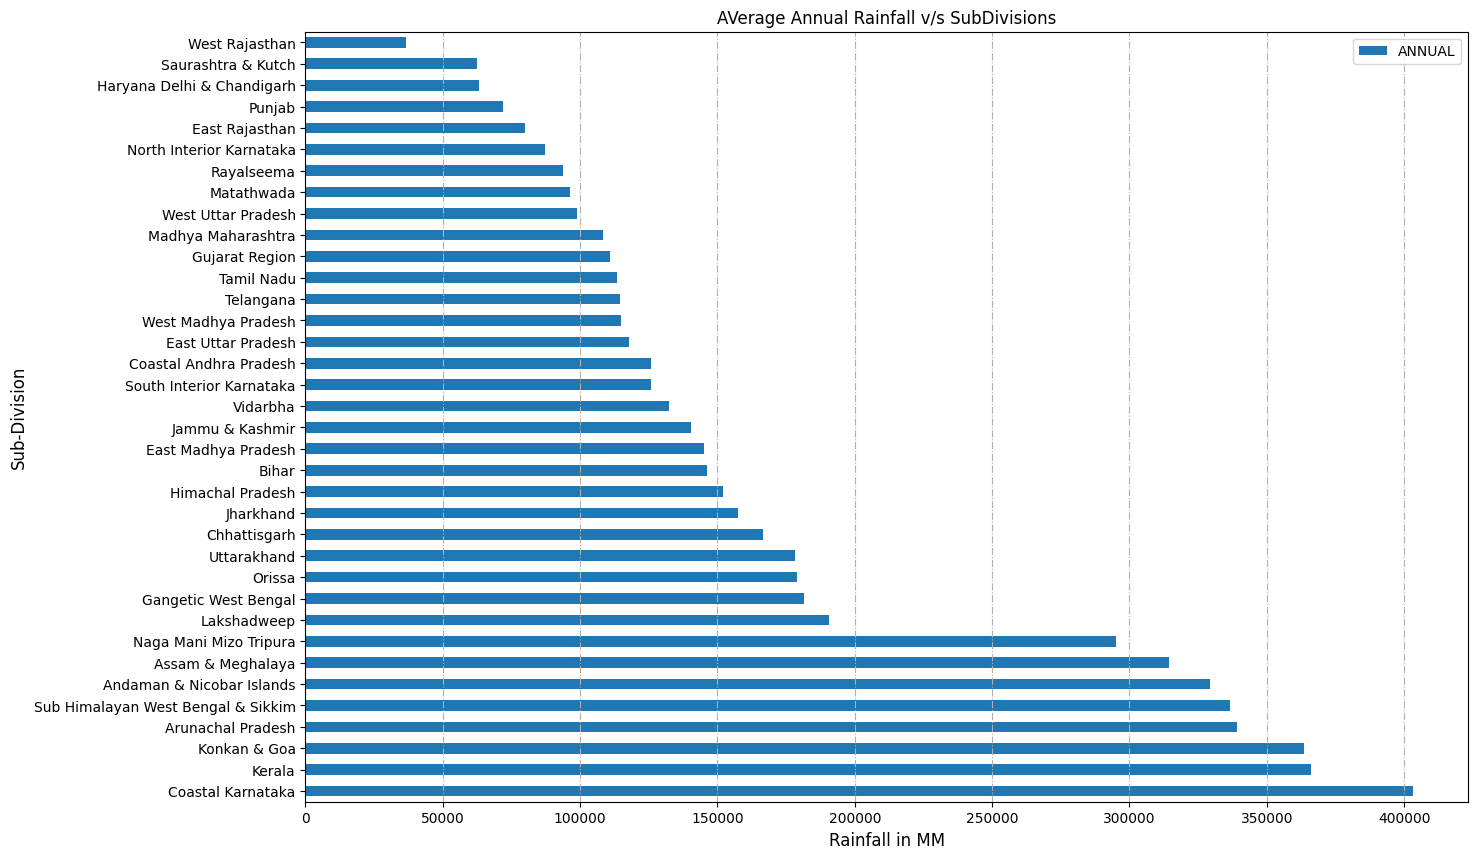

In [16]:
df[["SUBDIVISION","ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.title("AVerage Annual Rainfall v/s SubDivisions")
plt.grid(axis="x",linestyle="-.")
plt.show()

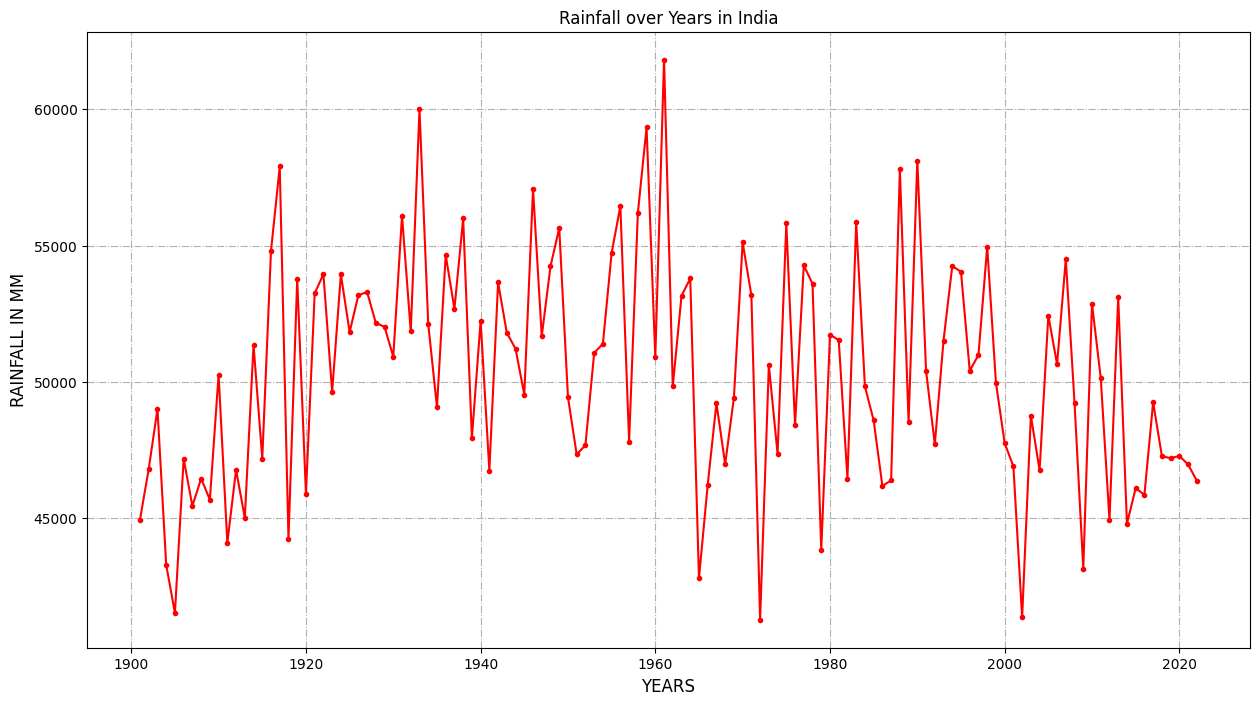

In [17]:
plt.figure(figsize=(15,8))
df.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years in India")
plt.show()

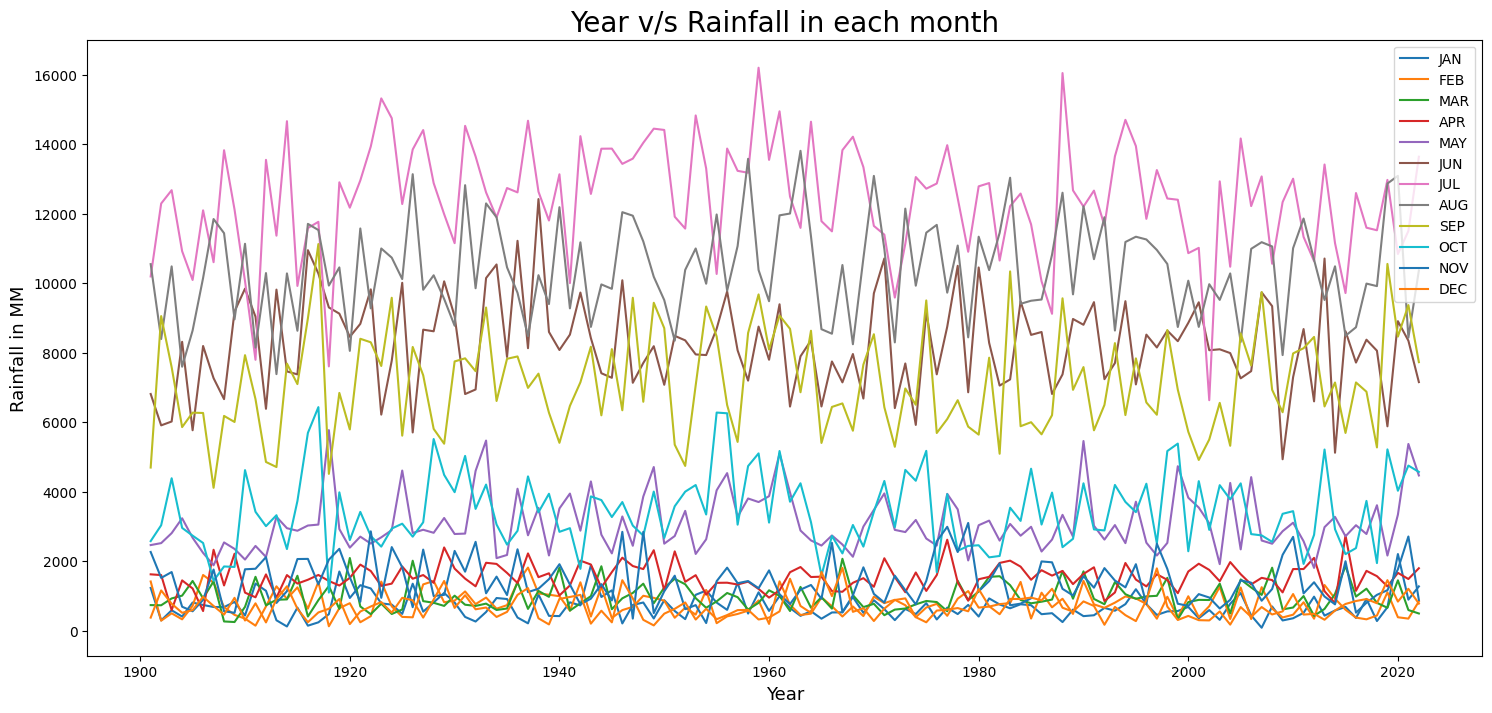

In [18]:
df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP',
      'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(kind="line",figsize=(18,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title("Year v/s Rainfall in each month",size=20)
plt.show()

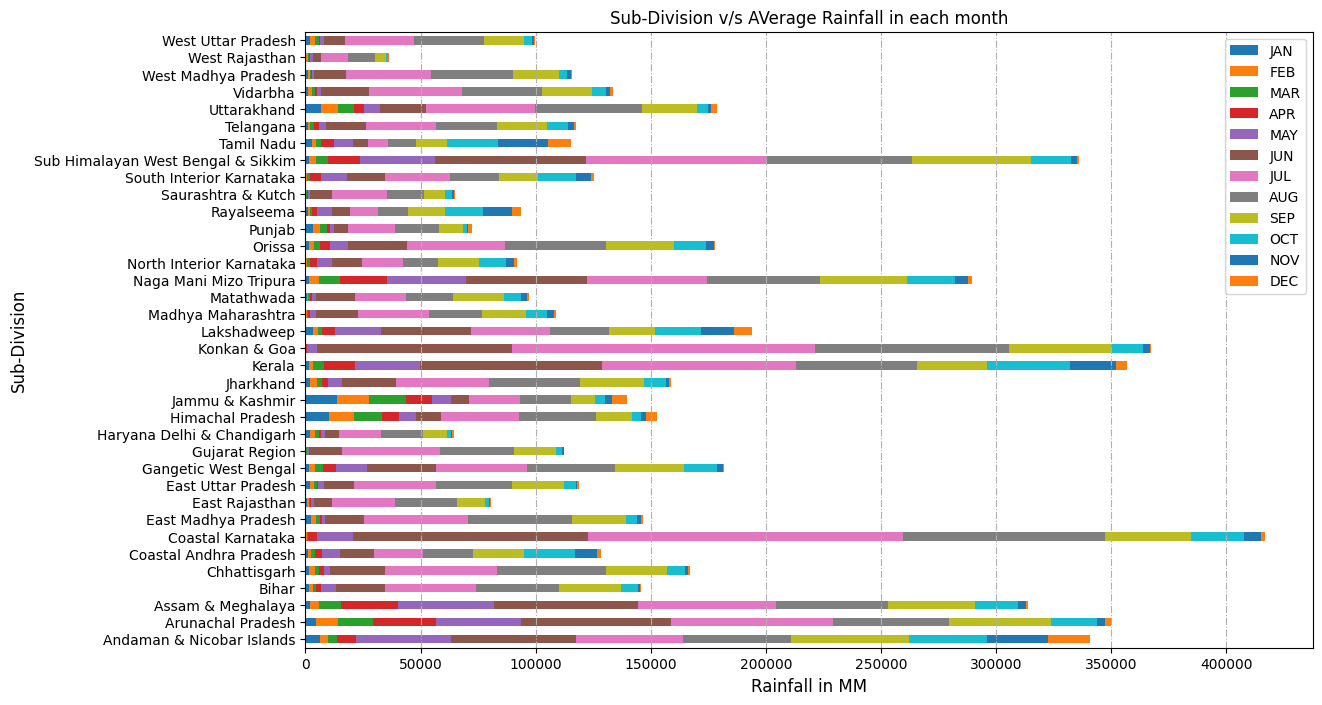

In [19]:
df[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(13,8))
plt.title("Sub-Division v/s AVerage Rainfall in each month")
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

### Analysis of rainfall data of GUJARAT

In [20]:
V = df.loc[((df['SUBDIVISION'] == 'Gujarat Region'))]
V.head(5)

SUBDIVISION  YEAR  JAN   FEB   MAR  APR   MAY   JUN    JUL    AUG  \
1319  Gujarat Region  1901  4.2   0.0   0.6  1.6   7.0  60.3  240.2  205.4   
1320  Gujarat Region  1902  3.9   0.0   0.0  0.6   1.0  32.8  229.8  299.0   
1321  Gujarat Region  1903  0.3   0.1   1.4  0.0  12.3  30.1  452.9  202.0   
1322  Gujarat Region  1904  0.8  10.6  16.8  0.2   3.9  48.3  194.8   71.8   
1323  Gujarat Region  1905  0.1   0.7   1.1  0.3   0.0  20.1  668.3   37.9   

        SEP   OCT  NOV   DEC  ANNUAL    JF   MAM   JJAS   OND  
1319   18.1  16.6  0.0   0.3   554.3   4.2   9.2  524.0  17.0  
1320  281.2   2.3  1.5  11.9   863.9   3.9   1.5  842.8  15.7  
1321  183.2   5.4  0.0   0.0   887.6   0.3  13.6  868.2   5.4  
1322  138.0   6.1  0.1   1.2   492.6  11.3  20.9  453.0   7.4  
1323   81.3   1.4  0.2   0.1   811.5   0.8   1.3  807.6   1.7

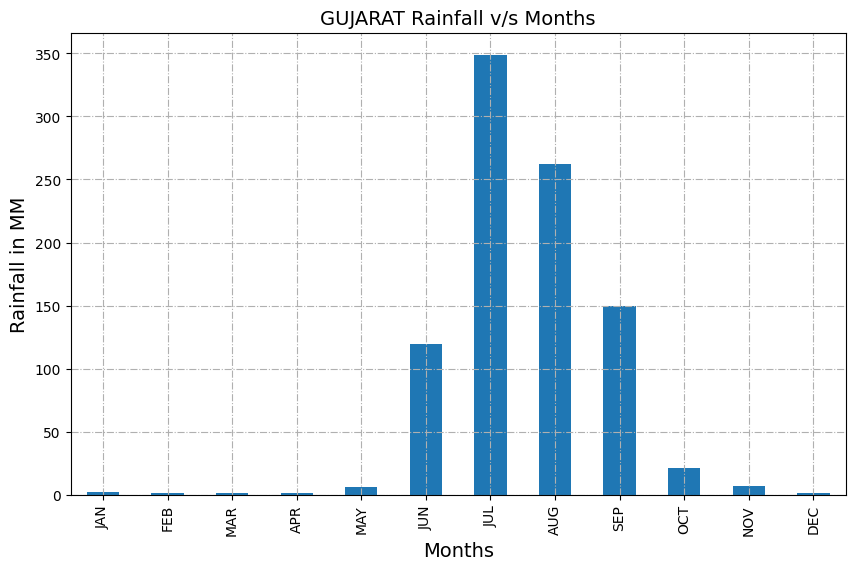

In [21]:
plt.figure(figsize=(10,6))
V[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("GUJARAT Rainfall v/s Months",size=14)
plt.xlabel("Months",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()

`From the above graph we observe that:-
 1)Tamil Nadu has good amount of rainfall in JUL and AUG`

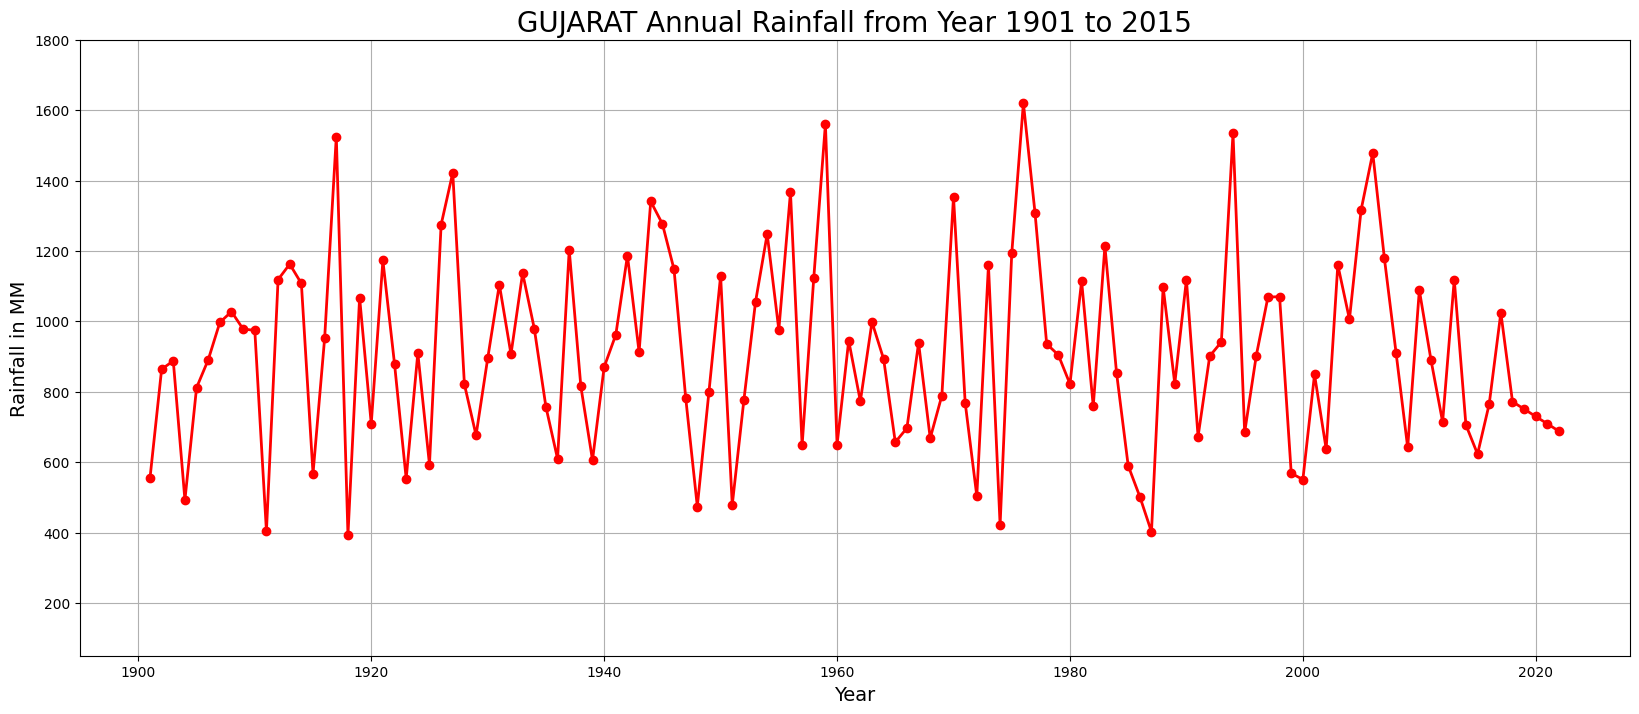

In [22]:
V.groupby("YEAR").sum()['ANNUAL'].plot(ylim=(50,1800),color='r',marker='o',linestyle='-',linewidth=2,figsize=(20,8));
plt.xlabel('Year',size=14)
plt.ylabel('Rainfall in MM',size=14)
plt.title('GUJARAT Annual Rainfall from Year 1901 to 2015',size=20)
plt.grid()
plt.show()

`From the Above graph we observe that:-
(1)The lowest rainfall in VIDARBHA was noted in 1920
(2)and, The highest Rainfall was noted in 1958`

## Modelling

In [23]:
df["SUBDIVISION"].nunique()

36

In [24]:
group = df.groupby('SUBDIVISION')[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
df=group.get_group(('Gujarat Region'))
df.head()

YEAR  JAN   FEB   MAR  APR   MAY   JUN    JUL    AUG    SEP   OCT  NOV  \
1319  1901  4.2   0.0   0.6  1.6   7.0  60.3  240.2  205.4   18.1  16.6  0.0   
1320  1902  3.9   0.0   0.0  0.6   1.0  32.8  229.8  299.0  281.2   2.3  1.5   
1321  1903  0.3   0.1   1.4  0.0  12.3  30.1  452.9  202.0  183.2   5.4  0.0   
1322  1904  0.8  10.6  16.8  0.2   3.9  48.3  194.8   71.8  138.0   6.1  0.1   
1323  1905  0.1   0.7   1.1  0.3   0.0  20.1  668.3   37.9   81.3   1.4  0.2   

       DEC  
1319   0.3  
1320  11.9  
1321   0.0  
1322   1.2  
1323   0.1

In [25]:
df2=df.melt(['YEAR']).reset_index()
df2.head()

index  YEAR variable  value
0      0  1901      JAN    4.2
1      1  1902      JAN    3.9
2      2  1903      JAN    0.3
3      3  1904      JAN    0.8
4      4  1905      JAN    0.1

In [26]:
df2= df2[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df2.head()

index  YEAR variable  value
0        0  1901      JAN    4.2
122    122  1901      FEB    0.0
244    244  1901      MAR    0.6
366    366  1901      APR    1.6
488    488  1901      MAY    7.0

In [27]:
df2.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [28]:
df2.columns=['Index','Year','Month','Avg_Rainfall']

In [29]:
df2.head()

Index  Year Month  Avg_Rainfall
0        0  1901   JAN           4.2
122    122  1901   FEB           0.0
244    244  1901   MAR           0.6
366    366  1901   APR           1.6
488    488  1901   MAY           7.0

In [30]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df2['Month']=df2['Month'].map(Month_map)
df2.head(12)

Index  Year  Month  Avg_Rainfall
0         0  1901      1           4.2
122     122  1901      2           0.0
244     244  1901      3           0.6
366     366  1901      4           1.6
488     488  1901      5           7.0
610     610  1901      6          60.3
732     732  1901      7         240.2
854     854  1901      8         205.4
976     976  1901      9          18.1
1098   1098  1901     10          16.6
1220   1220  1901     11           0.0
1342   1342  1901     12           0.3

In [31]:
df2.drop(columns="Index",inplace=True)

In [32]:
df2.head(2)

Year  Month  Avg_Rainfall
0    1901      1           4.2
122  1901      2           0.0

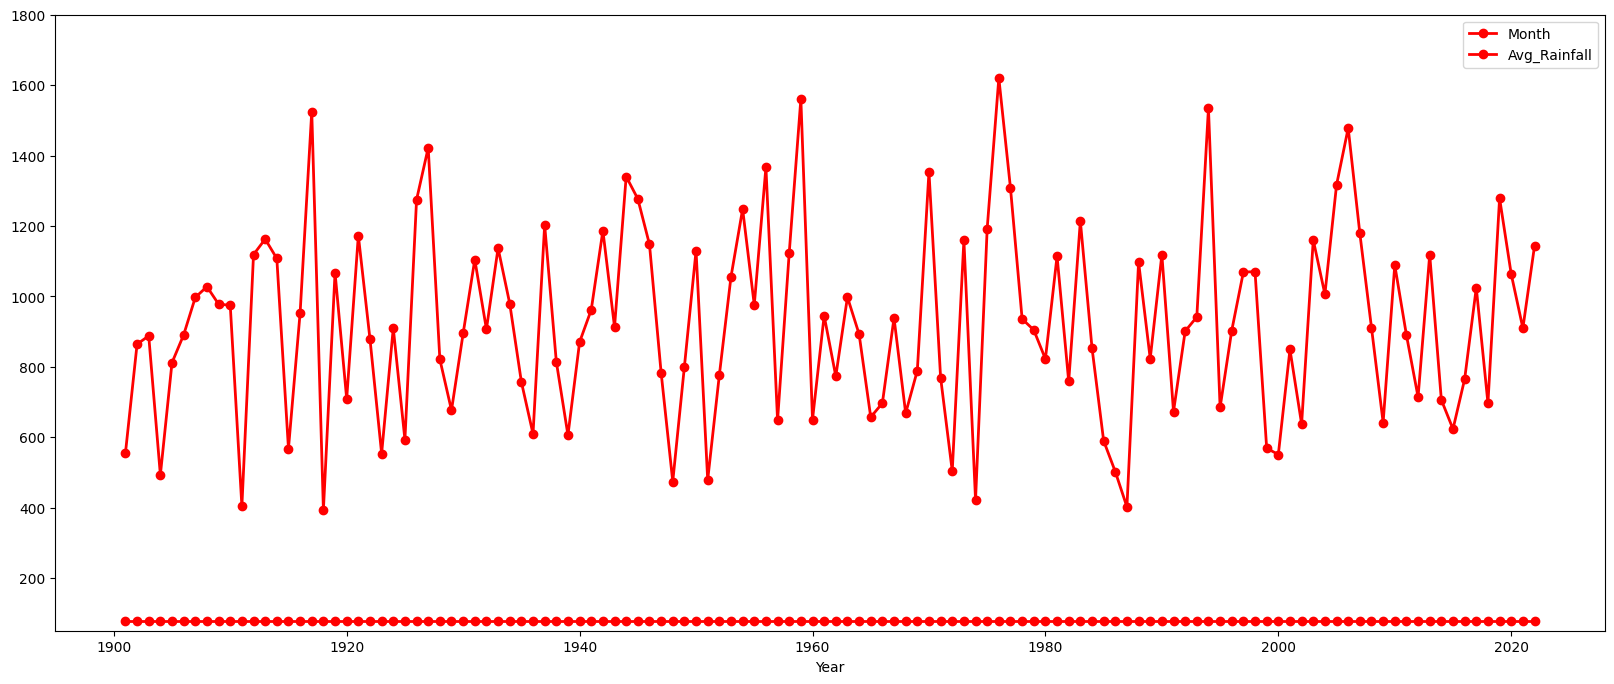

In [33]:
df2.groupby("Year").sum().plot(ylim=(50,1800),color='r',marker='o',linestyle='-',linewidth=2,figsize=(20,8));
plt.show()

In [34]:
X=np.asanyarray(df2[['Year','Month']]).astype('int')
y=np.asanyarray(df2['Avg_Rainfall']).astype('int')

In [35]:
X

array([[1901,    1],
       [1901,    2],
       [1901,    3],
       ...,
       [2022,   10],
       [2022,   11],
       [2022,   12]])

In [36]:
X[:15]

array([[1901,    1],
       [1901,    2],
       [1901,    3],
       [1901,    4],
       [1901,    5],
       [1901,    6],
       [1901,    7],
       [1901,    8],
       [1901,    9],
       [1901,   10],
       [1901,   11],
       [1901,   12],
       [1902,    1],
       [1902,    2],
       [1902,    3]])

In [37]:
y

array([ 4,  0,  0, ..., 37,  0,  0])

In [38]:
print(X.shape)
print(y.shape)

(1464, 2)
(1464,)


In [39]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [40]:
X_train

array([[1982,   11],
       [1981,    9],
       [2002,    5],
       ...,
       [1944,   12],
       [1996,   10],
       [2008,    6]])

In [41]:
y_train

array([ 96, 137,   0, ...,   0,  23,  58])

### ❏ Linear Regression Model

In [42]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [43]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [44]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_test_predict),2)

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 102.93122013274149
MSE: 20247.20787473828
RMSE: 142.29268384122312
Explained Variance Score: 0.007669244505088324 2

-------Train Data--------
MAE: 94.68172422755126
MSE: 17441.487911472475
RMSE: 132.06622547598033

-----Training Accuracy-------
3.5000000000000004
-----Testing Accuracy--------
0.7000000000000001


In [45]:
predicted = LR.predict([[2014,2]])

In [46]:
predicted

array([46.85045558])

### ❏ Random Forest Model

In [106]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [107]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [108]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 45.20547911121115
MSE: 7307.2326047897
RMSE: 85.48235259274104

-------Train Data--------
MAE: 31.702258810839595
MSE: 3937.4334815528487
RMSE: 62.74897195614322


In [109]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
78.2
-----------Testing Accuracy------------
64.1


In [51]:
predicted = random_forest_model.predict([[2014,2]])

In [52]:
predicted

array([0.72373648])

In [53]:
predicted = random_forest_model.predict([[2001,3]])

In [54]:
predicted

array([0.56182071])

### ❏ SVM

In [55]:
from sklearn import svm
svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train)

SVC()

In [56]:
y_train_predict=svm_regr.predict(X_train)
y_test_predict=svm_regr.predict(X_test)

In [57]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 83.48464163822526
MSE: 27349.969283276452
RMSE: 165.37826121735725

-------Train Data--------
MAE: 74.78992314261315
MSE: 23659.70708795901
RMSE: 153.81712221972887


In [58]:
print("-----------Training Accuracy------------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(svm_regr.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
44.2
-----------Testing Accuracy------------
40.300000000000004


### ❏ Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0,solver='sag',class_weight='balanced', max_iter=100000, C=0.1)
logreg.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=100000,
                   random_state=0, solver='sag')

In [94]:
y_train_predict=logreg.predict(X_train)
y_test_predict=logreg.predict(X_test)

In [95]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 78.21501706484642
MSE: 20768.34470989761
RMSE: 144.1122642591449

-------Train Data--------
MAE: 72.24508966695133
MSE: 18034.564474807856
RMSE: 134.29283106259936


In [96]:
print("-----------Training Accuracy------------")
print(round(logreg.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(logreg.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
0.7000000000000001
-----------Testing Accuracy------------
0.3


### ❏ xgboost

In [97]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [98]:
y_train_predict=xgb.predict(X_train)
y_test_predict=xgb.predict(X_test)

In [99]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 54.25606564687781
MSE: 10058.305291316701
RMSE: 100.29110275252089

-------Train Data--------
MAE: 12.748307283866728
MSE: 595.6795217498276
RMSE: 24.40654669857716


In [100]:
print("-----------Training Accuracy------------")
print(round(xgb.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(xgb.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
96.7
-----------Testing Accuracy------------
50.6


### ❏ Gradient Boosting Regressor

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [103]:
y_train_predict=gbr.predict(X_train)
y_test_predict=gbr.predict(X_test)

In [104]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 43.60983056495828
MSE: 6588.766697242834
RMSE: 81.17121840432625

-------Train Data--------
MAE: 35.691582218881614
MSE: 4599.940648043519
RMSE: 67.82286228141304


In [105]:
print("-----------Training Accuracy------------")
print(round(gbr.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(gbr.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
74.5
-----------Testing Accuracy------------
67.7


In [71]:
import pickle
models = {
    'LinearRegression': LR,
    'RandomForest': random_forest_model,
    'SVM': svm_regr,
    'LogisticRegression': logreg,
    'XGBoost': xgb,
    'GradientBoostingRegressor': gbr
}

# Save all models in a pkl file
with open('rainfall_models.pkl', 'wb') as f:
    pickle.dump(models, f)

In [1]:
print("Model accuracy:")
print("Linear regression: 0.31 %. \nLogistic Regression: 0.45% \nSupport Vector Machines: 41.1% \nXGBoost: 50.6%. \nRandom forest: 64.1%. ")


Model accuracy:
Linear regression: 0.31 %. 
Logistic Regression: 0.45% 
Support Vector Machines: 41.1% 
XGBoost: 50.6%. 
Random forest: 64.1%. 
